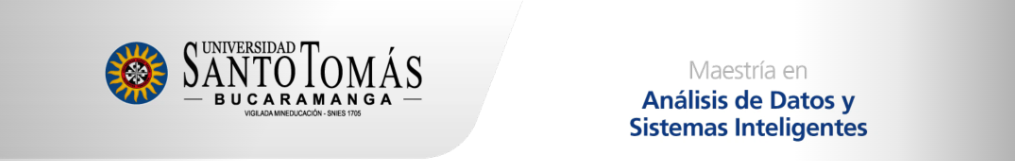

## **Minería de Datos**
**Luis Ariel Avellaneda Domínguez**  
**Actividad Sección 2**

# **Taller: Herramientas estadísticas en minería de datos**
 Las actividades del taller se llevan a cabo usando los datos del archivo Base_Datos.csv. Los resultados se deben entregar en un informe donde se hace su respectivo análisis y discusión.  
*1. Determinar el tipo de dato de cada atributo de la base de datos.  
 2. Realizar una limpieza de la base de datos y reportar posibles anomalías, duplicados y datos ausentes.  
 3. Graficar y calcular el índice de correlación entre los atributos Edad/Peso, Edad/Altura y Peso/Altura. ¿Existe correlación entre ellos?  
 4. Calcular la media y varianza de los atributos Edad, Peso y Altura.  
 5. Obtener el diagrama de frecuencias de los atributos Edad, Peso y Altura.Ubicar los percentiles 70%, 50% y 20%.*

# **1. Determinar el tipo de dato de cada atributo de la base de datos.**

In [1]:
# Paso 1: Montar desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Ruta al archivo en tu Google Drive
ruta = '/content/drive/My Drive/Base_Datos.csv'  # Ajusta si está en otra carpeta

# Leer el CSV usando tabulaciones como separador
df = pd.read_csv(ruta, sep='\t')

# Mostrar las primeras filas para verificar que se cargó bien
df.head()

,Persona,Edad (Años),Peso (Kg),Altura (cm),Sexo
0,1,62,57.8,157.2,M
1,2,53,51.0,159.0,M
2,3,41,51.0,157.0,F
3,4,49,63.0,172.0,M
4,5,49,47.5,157.6,F


Revisamos los tipos de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Persona      49 non-null     int64  
 1   Edad (Años)  49 non-null     int64  
 2   Peso (Kg)    49 non-null     float64
 3   Altura (cm)  49 non-null     float64
 4   Sexo         49 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


| Atributo      | Tipo asignado | ¿Es adecuado? | Justificación                                                                  |
| ------------- | ------------- | ------------- | ------------------------------------------------------------------------------ |
| `Persona`     | `int64`       | ✅ Sí          | Aunque es un ID, el tipo entero está bien asignado. No se usará para cálculos. |
| `Edad (Años)` | `int64`       | ✅ Sí          | Es un número entero y tiene sentido como edad.                                 |
| `Peso (Kg)`   | `float64`     | ✅ Sí          | El peso puede tener decimales, así que es correcto.                            |
| `Altura (cm)` | `float64`     | ✅ Sí          | Aunque esté en centímetros, puede tener decimales. Correcto.                   |
| `Sexo`        | `object`      | ✅ Sí          | Es una variable categórica (texto: `'M'` o `'F'`). Está bien como `object`.    |

Observamos que los tipos de datos de los atributos están asignados correctamente con lo que se busca describir.


# **2. Realizar una limpieza de la base de datos y reportar posibles anomalías, duplicados y datos ausentes.**

1. Verificamos datos ausentes (missing values)

In [4]:
df.isnull().sum()

,0
Persona,0
Edad (Años),0
Peso (Kg),0
Altura (cm),0
Sexo,0


2. Verificamos si hay duplicados

In [5]:
df.duplicated().sum()

np.int64(0)

3. Detectar posibles anomalías (valores fuera de rango)  
a) Estadísticas generales

In [6]:
df.describe()

,Persona,Edad (Años),Peso (Kg),Altura (cm)
count,49.00000,49.000000,49.000000,49.000000
mean,25.00000,50.428571,58.559184,163.589796
std,14.28869,8.346656,11.241106,8.828464
min,1.00000,39.000000,37.500000,143.500000
25%,13.00000,44.000000,51.000000,158.000000
50%,25.00000,49.000000,57.000000,161.000000
75%,37.00000,54.000000,65.000000,169.800000
max,49.00000,74.000000,91.600000,187.400000


b) Revisamos con reglas lógicas

In [7]:
# Ver edades sospechosas (menores a 0 o mayores a 100)
df[(df['Edad (Años)'] < 0) | (df['Edad (Años)'] > 100)]

# Ver pesos fuera de rango razonable
df[(df['Peso (Kg)'] < 30) | (df['Peso (Kg)'] > 100)]

# Ver alturas sospechosas
df[(df['Altura (cm)'] < 100) | (df['Altura (cm)'] > 200)]


,Persona,Edad (Años),Peso (Kg),Altura (cm),Sexo


Como el dataset no es tan extenso, visualizamos todas las filas

In [8]:
# Mostrar todas las filas del DataFrame
pd.set_option('display.max_rows', None)

# Ahora muestra todas las filas
df

,Persona,Edad (Años),Peso (Kg),Altura (cm),Sexo
0,1,62,57.8,157.2,M
1,2,53,51.0,159.0,M
2,3,41,51.0,157.0,F
3,4,49,63.0,172.0,M
4,5,49,47.5,157.6,F
5,6,52,46.1,160.8,F
6,7,40,50.0,154.0,M
7,8,49,65.0,156.5,F
8,9,64,59.0,160.0,M
9,10,57,57.0,163.0,F


Se realizó un proceso de limpieza del conjunto de datos con el objetivo de garantizar su calidad y consistencia para análisis posteriores. Las acciones y hallazgos fueron los siguientes:

- **Valores ausentes:** Se verificó la existencia de valores nulos en todas las columnas y no se detectaron datos faltantes.
- **Duplicados:** Se comprobó la presencia de registros duplicados y no se identificaron filas repetidas.
- **Anomalías:** Se establecieron reglas lógicas para detectar posibles valores atípicos:
  - `Edad (Años)` fuera del rango 0–100 años.
  - `Peso (Kg)` fuera del rango 30–100 kg.
  - `Altura (cm)` fuera del rango 100–200 cm.
  
  Tras aplicar estos filtros, no se encontraron registros con valores que excedieran dichos rangos, por lo que no fue necesario eliminar ni modificar datos.

En conclusión, el conjunto de datos se encuentra **completo, sin duplicados y sin valores anómalos evidentes**, quedando listo para los análisis posteriores.


# **3. Graficar y calcular el índice de correlación entre los atributos Edad/Peso, Edad/Altura y Peso/Altura. ¿Existe correlación entre ellos?**

**Correlación entre atributos**

Para analizar la relación entre los atributos numéricos del conjunto de datos, se utilizó el **coeficiente de correlación de Pearson**, que mide la fuerza y dirección de la relación lineal entre dos variables cuantitativas.

Esta medida es adecuada en nuestro caso porque:

- Las variables analizadas (`Edad (Años)`, `Peso (Kg)` y `Altura (cm)`) son **numéricas y continuas**.
- Pearson es una métrica **independiente de la escala y unidades** de las variables, por lo que no es necesario normalizar los datos.
- Es una herramienta estándar para detectar **relaciones lineales** entre pares de variables.

El valor del coeficiente varía entre -1 y 1:
- **+1** indica una correlación lineal positiva perfecta.
- **-1** indica una correlación negativa perfecta.
- **0** indica ausencia de correlación lineal.

A continuación, se presentan los resultados del análisis de correlación entre los atributos seleccionados.


Correlación entre Edad (Años) y Peso (Kg): 0.0480


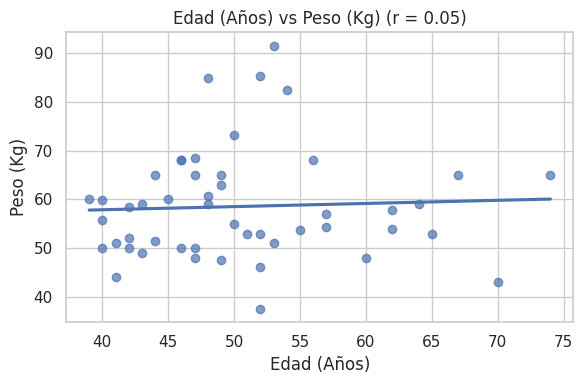

Correlación entre Edad (Años) y Altura (cm): -0.1827


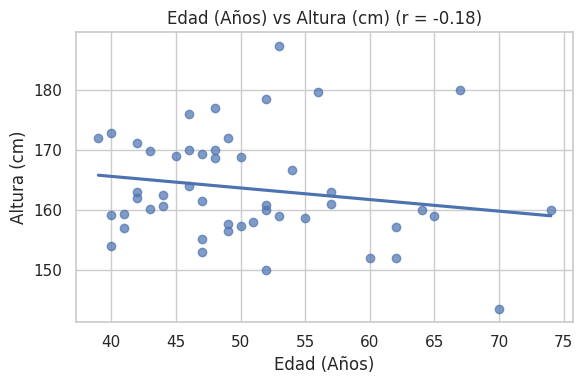

Correlación entre Peso (Kg) y Altura (cm): 0.7065


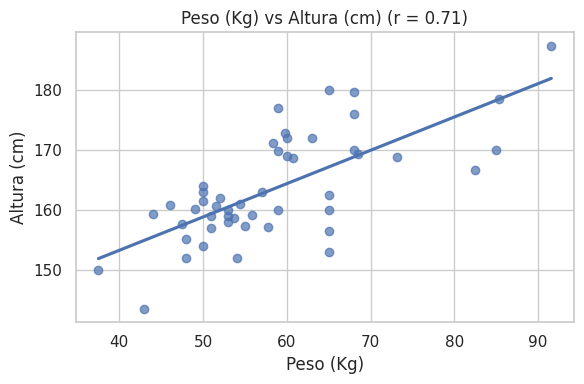

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar estilo visual
sns.set(style="whitegrid")

# Lista de pares a analizar
pares = [
    ('Edad (Años)', 'Peso (Kg)'),
    ('Edad (Años)', 'Altura (cm)'),
    ('Peso (Kg)', 'Altura (cm)')
]

# Calcular y graficar
for x, y in pares:
    # Calcular correlación de Pearson
    corr = df[x].corr(df[y])
    print(f"Correlación entre {x} y {y}: {corr:.4f}")

    # Scatter plot con línea de regresión
    plt.figure(figsize=(6,4))
    sns.regplot(x=df[x], y=df[y], ci=None, scatter_kws={'alpha':0.7})
    plt.title(f'{x} vs {y} (r = {corr:.2f})')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

**Correlación entre atributos**

Se analizaron las relaciones entre las variables `Edad (Años)`, `Peso (Kg)` y `Altura (cm)` mediante el cálculo del coeficiente de correlación de Pearson y la visualización con gráficos de dispersión con línea de tendencia lineal.

**Resultados:**

- **Edad y Peso:** r = 0.048  
  → Correlación prácticamente nula. No se observa una relación lineal entre la edad y el peso de las personas del conjunto de datos.

- **Edad y Altura:** r = -0.183  
  → Correlación negativa débil. A medida que aumenta la edad, podría haber una ligera tendencia a una menor altura, aunque la relación es poco significativa.

- **Peso y Altura:** r = 0.707  
  → Correlación positiva fuerte. Existe una relación lineal clara entre el peso y la altura: en general, las personas más altas tienden a tener mayor peso.

**Conclusión**

Solo la relación entre **peso y altura** presenta una **correlación significativa y positiva**. Las otras combinaciones muestran correlaciones débiles o inexistentes, lo cual indica que no existe una relación lineal clara entre edad y las otras variables en este conjunto de datos.


# **4. Calcular la media y varianza de los atributos Edad, Peso y Altura.**

In [10]:
# Lista de atributos numéricos a analizar
atributos = ['Edad (Años)', 'Peso (Kg)', 'Altura (cm)']

# Calcular media y varianza
for col in atributos:
    media = df[col].mean()
    varianza = df[col].var()  # Nota: esta es la varianza muestral (n-1)
    print(f"{col}:")
    print(f"  Media    = {media:.2f}")
    print(f"  Varianza = {varianza:.2f}\n")

Edad (Años):
  Media    = 50.43
  Varianza = 69.67

Peso (Kg):
  Media    = 58.56
  Varianza = 126.36

Altura (cm):
  Media    = 163.59
  Varianza = 77.94



Para complementar gráficamente este punto, crearemos un boxplot y la curva normal por atributo.

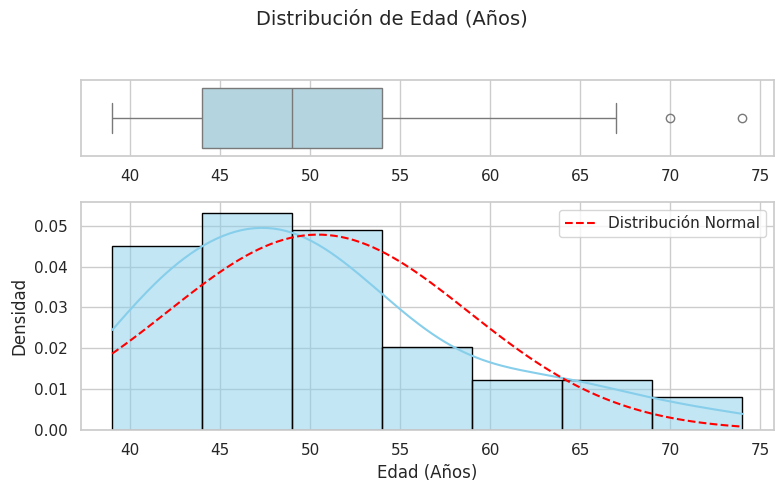

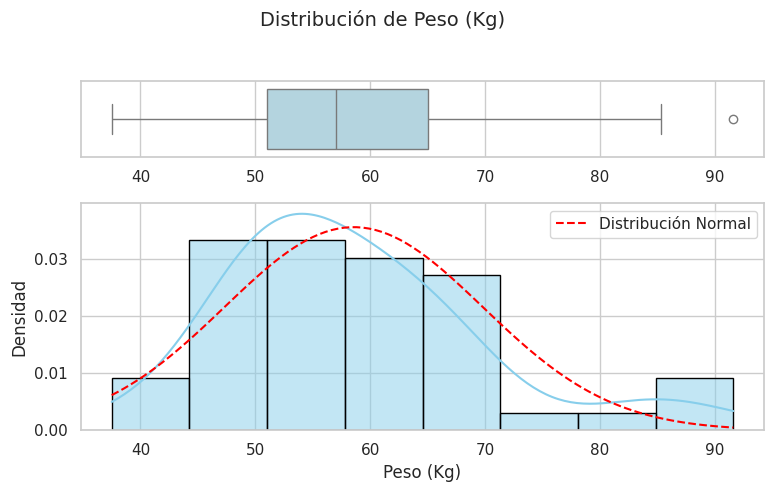

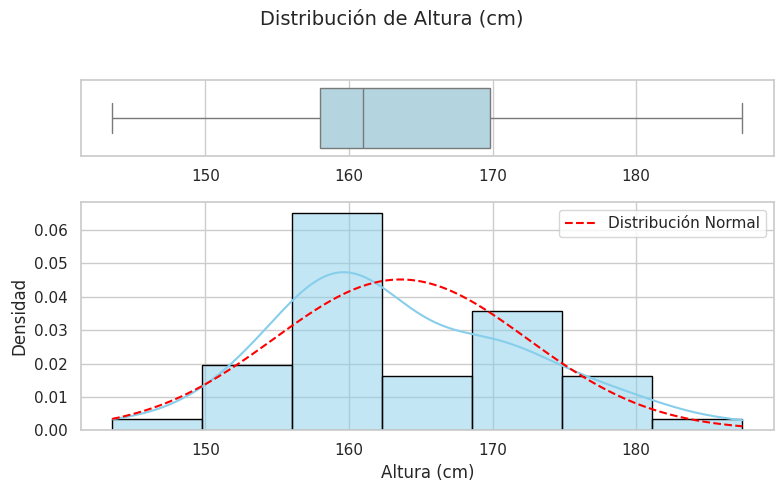

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Asegurar estilo
sns.set(style="whitegrid")

# Variables a graficar
atributos = ['Edad (Años)', 'Peso (Kg)', 'Altura (cm)']

for atributo in atributos:
    datos = df[atributo]

    # Crear figura con 2 subplots: boxplot y distribución
    fig, axes = plt.subplots(2, 1, figsize=(8, 5), gridspec_kw={'height_ratios': [1, 3]})
    fig.suptitle(f'Distribución de {atributo}', fontsize=14)

    # Boxplot horizontal (arriba)
    sns.boxplot(x=datos, ax=axes[0], color='lightblue', orient='h')
    axes[0].set(xlabel='')

    # Histograma + curva KDE (abajo)
    sns.histplot(datos, kde=True, stat='density', ax=axes[1], color='skyblue', edgecolor='black')

    # Superponer distribución normal teórica con misma media y std (opcional)
    media = datos.mean()
    std = datos.std()
    x_vals = np.linspace(datos.min(), datos.max(), 100)
    normal_curve = norm.pdf(x_vals, media, std)
    axes[1].plot(x_vals, normal_curve, color='red', linestyle='--', label='Distribución Normal')
    axes[1].legend()

    axes[1].set_xlabel(atributo)
    axes[1].set_ylabel('Densidad')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Dejar espacio para el título
    plt.show()

**Media y varianza de los atributos**

Se calcularon las medidas estadísticas de tendencia central y dispersión para los atributos numéricos `Edad (Años)`, `Peso (Kg)` y `Altura (cm)`. Los resultados son los siguientes:

| Atributo      | Media   | Varianza |
|---------------|---------|----------|
| Edad (Años)   | 50.43   | 69.67    |
| Peso (Kg)     | 58.56   | 126.36   |
| Altura (cm)   | 163.59  | 77.94    |

Estos valores indican que el **peso** es el atributo con mayor dispersión en los datos, seguido por la **altura** y luego la **edad**.

Para complementar el análisis estadístico, se realizaron diagramas de caja (boxplots) y distribuciones de densidad con ajuste de curva normal para cada variable. A partir de estas visualizaciones, se observaron las siguientes características:

- **Edad (Años):** La distribución presenta cierta asimetría hacia la izquierda y algunos valores atípicos (outliers) por encima de los 70 años. Esto explica parte de su varianza moderada.
  
- **Peso (Kg):** Se evidencia una distribución con mayor dispersión y un sesgo leve hacia la derecha, junto con un outlier notable por encima de los 90 kg. Esto concuerda con la mayor varianza observada.

- **Altura (cm):** Presenta una distribución relativamente simétrica, sin outliers visibles y con un ajuste más cercano a la forma de una distribución normal. Su varianza es intermedia.

> En conjunto, los análisis numéricos y gráficos permiten concluir que los tres atributos tienen comportamientos de dispersión distintos, siendo el **peso** el más variable y la **altura** la más cercana a una distribución normal.



# **5. Obtener el diagrama de frecuencias de los atributos Edad, Peso y Altura. Ubicar los percentiles 70%, 50% y 20%.**

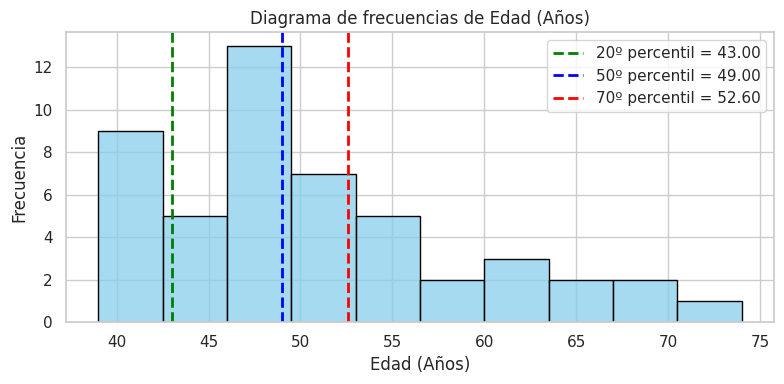

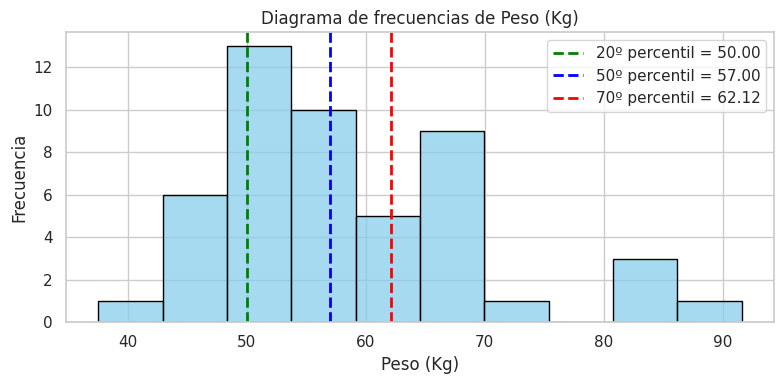

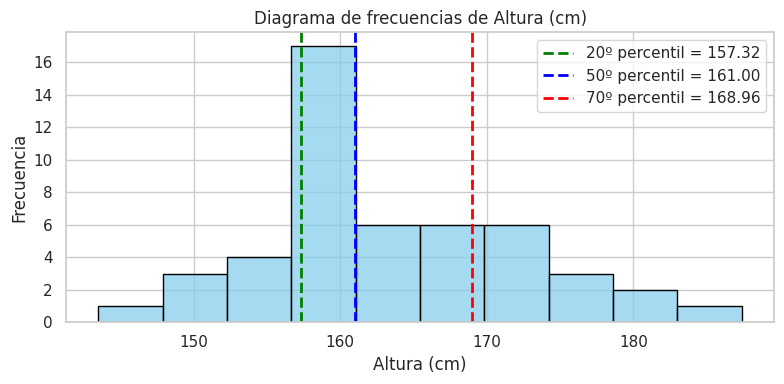

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

atributos = ['Edad (Años)', 'Peso (Kg)', 'Altura (cm)']
percentiles = [20, 50, 70]
colores = ['green', 'blue', 'red']  # Colores distintos para cada línea

for atributo in atributos:
    datos = df[atributo]

    # Calcular percentiles
    p_values = {p: np.percentile(datos, p) for p in percentiles}

    # Crear histograma
    plt.figure(figsize=(8, 4))
    sns.histplot(datos, bins=10, kde=False, color='skyblue', edgecolor='black')

    # Agregar líneas verticales con color distinto y etiquetas únicas
    for p, color in zip(percentiles, colores):
        val = p_values[p]
        plt.axvline(val, color=color, linestyle='--', linewidth=2, label=f'{p}º percentil = {val:.2f}')

    plt.title(f'Diagrama de frecuencias de {atributo}')
    plt.xlabel(atributo)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

**Diagrama de frecuencias y percentiles**

Se construyeron histogramas para visualizar la distribución de frecuencias de los atributos `Edad (Años)`, `Peso (Kg)` y `Altura (cm)`. Sobre cada gráfico se marcaron los percentiles 20%, 50% (mediana) y 70%, con el objetivo de analizar cómo se distribuyen los datos y en qué rangos se concentran.

A continuación se resumen los valores correspondientes a cada percentil por atributo:

| Atributo      | 20º Percentil | 50º Percentil (Mediana) | 70º Percentil |
|---------------|----------------|--------------------------|----------------|
| Edad (Años)   | 43.00           | 49.00                    | 52.60           |
| Peso (Kg)     | 50.00           | 57.00                    | 62.12           |
| Altura (cm)   | 157.32          | 161.00                   | 168.96          |

**Observaciones:**

- La mayor concentración de datos se encuentra entre los percentiles 20 y 70, lo que representa el 50% central de la distribución.
- En los tres atributos, los histogramas muestran una distribución **moderadamente asimétrica**, especialmente en el caso del peso, donde se observan más valores altos (sesgo a la derecha).
- En `Altura (cm)`, la distribución es más simétrica, con los percentiles bastante próximos a la media.

Estos percentiles permiten establecer rangos útiles para análisis de población, comparación entre individuos o clasificación basada en percentiles.


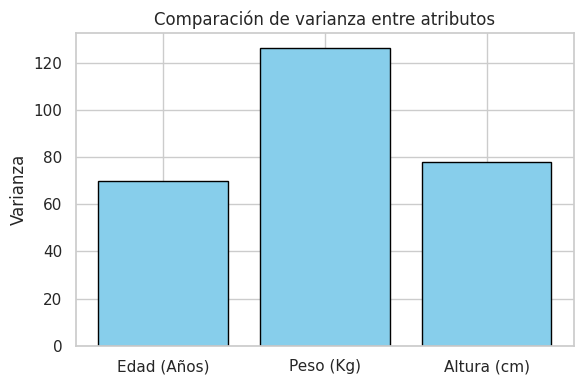

In [13]:
import matplotlib.pyplot as plt

# Calcular varianzas
atributos = ['Edad (Años)', 'Peso (Kg)', 'Altura (cm)']
varianzas = [df[col].var() for col in atributos]

# Graficar
plt.figure(figsize=(6, 4))
plt.bar(atributos, varianzas, color='skyblue', edgecolor='black')
plt.title('Comparación de varianza entre atributos')
plt.ylabel('Varianza')
plt.tight_layout()
plt.show()